In [1]:
import sys
sys.path.append('../../')

import numpy as np

from src.mechanism.single_item import SingleItemAuction
from src.game import Game
from src.strategy import Strategy

from src.learner.frank_wolfe import FrankWolfe
from src.learner.poga import POGA
from src.learner.soda import SODA

**Setting**
create specific Single Item Auction setting

In [3]:
# parameter mechanism
bidder = ['1', '1']
o_space = {'1': [0.0, 1.0]}
a_space = {'1': [0.0, 1.0]}

param_prior = {
    'distribution':'uniform'
    }
param_util = {
    'payment_rule': 'first_price', 
    'tie_breaking': 'lose', 
    'risk':1.0
    }

# parameter approximation game
n = 64
m = 64

# create mechanism
mechanism = SingleItemAuction(bidder, o_space, a_space, param_prior, param_util)

# create approximation game
game = Game(mechanism, n, m)
game.get_utility(mechanism)



**Learner**
Specify Learning Algorithm

In [4]:
# parameter learner
max_iter = int(1e4)
tol = 1e-4
stop_criterion = 'util_loss'
steprule_bool = True
eta = 50
beta = 1/20

learner = SODA(max_iter, tol, stop_criterion, steprule_bool, eta, beta)
#learner = FrankWolfe(max_iter, tol, stop_criterion)
#learner = POGA(max_iter, tol, stop_criterion, steprule_bool, eta, beta)

Run Learning Algorithm

In [7]:
#create and initialize strategies
strategies = {}
for i in game.set_bidder:
    strategies[i] = Strategy(i, game)
    strategies[i].initialize('random')
    
# run soda
learner.run(mechanism, game, strategies, disable_tqdm=False, print=True)

  4%|▊                   | 389/10.0k [00:00<00:05, 1.73kit/s]

Convergence after 389 iterations
Value of stopping criterion (util_loss) 0.0001


Visualization of the learning process and the final result

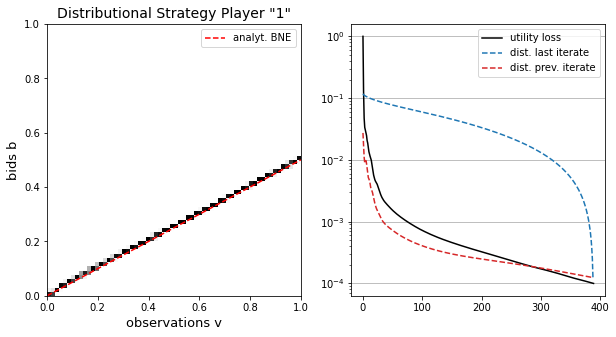

In [8]:
beta = mechanism.get_bne('1', strategies['1'].o_discr)
strategies['1'].plot(more=True, beta=beta)

We can also look at intermediate strategies and gradients (e.g. after 25 iterations)

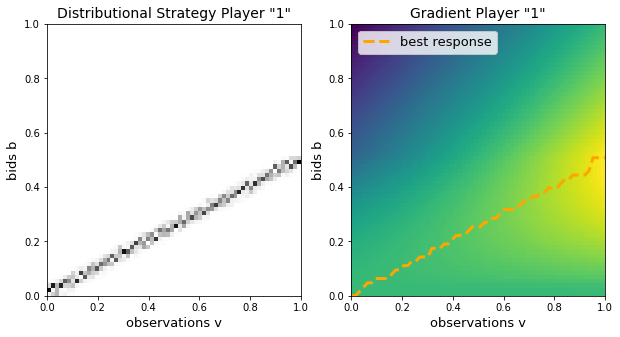

In [9]:
strategies['1'].plot(grad=True, iter=25)